In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

Data visualization

In [2]:
df = pd.read_csv("ds_salaries.csv")
df.drop(columns='Unnamed: 0', inplace=True)
print(df.head())
print(df.describe())

   work_year experience_level employment_type                   job_title  \
0       2020               MI              FT              Data Scientist   
1       2020               SE              FT  Machine Learning Scientist   
2       2020               SE              FT           Big Data Engineer   
3       2020               MI              FT        Product Data Analyst   
4       2020               SE              FT   Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   70000             EUR          79833                 DE             0   
1  260000             USD         260000                 JP             0   
2   85000             GBP         109024                 GB            50   
3   20000             USD          20000                 HN             0   
4  150000             USD         150000                 US            50   

  company_location company_size  
0               DE            L  
1     

Filter columns and get unique values

In [3]:
dic_unique = {}
filters = ["work_year", "experience_level", "employment_type", "job_title", "employee_residence", "company_location", "company_size"]
for element in filters:
    dic_unique[element] = list(df[element].unique())

Analyze data type and convert object to strings

In [4]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")
df.dtypes

work_year              int64
experience_level      string
employment_type       string
job_title             string
salary                 int64
salary_currency       string
salary_in_usd          int64
employee_residence    string
remote_ratio           int64
company_location      string
company_size          string
dtype: object

Filter by years, boxplot by experience level every year

Text(0.5, 1.0, '2022')

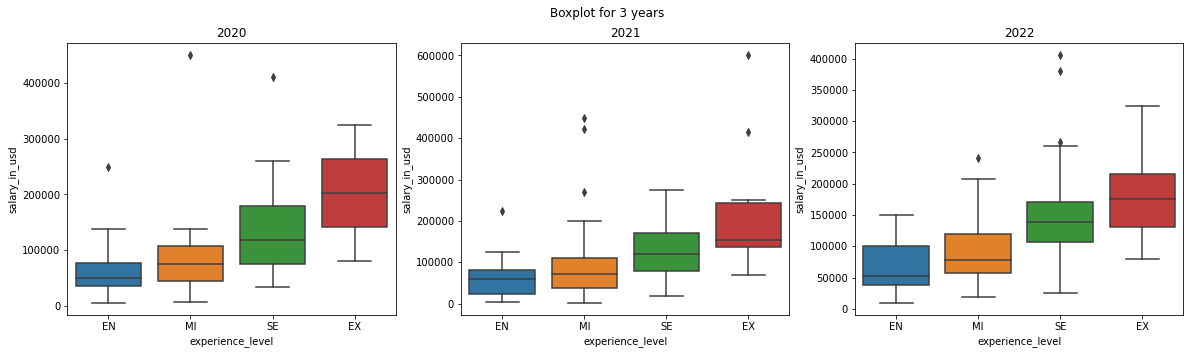

In [6]:
df_2020 = df.query("work_year == 2020")
df_2021 = df.query("work_year == 2021")
df_2022 = df.query("work_year == 2022")

fig, axes = plt.subplots(1, 3, sharey = False, sharex = True, figsize = (20,5))
fig.suptitle("Boxplot for 3 years")

sb.boxplot(ax = axes[0], data=df_2020, x="experience_level", y="salary_in_usd", order=["EN", "MI", "SE", "EX"])
axes[0].set_title(2020)
sb.boxplot(ax = axes[1], data=df_2021, x="experience_level", y="salary_in_usd", order=["EN", "MI", "SE", "EX"])
axes[1].set_title(2021)
sb.boxplot(ax = axes[2], data=df_2022, x="experience_level", y="salary_in_usd", order=["EN", "MI", "SE", "EX"])
axes[2].set_title(2022)

LEGEND: EN: Entry/Junior
        MI: Mid/Intermediate
        SE: Senior/Expert
        EX: Executive/Director

It is noted that the plots are increasing according to experience level, we can see some outliers that need to be removed to continue the analysis,

In [7]:
df_2020[(np.abs(stats.zscore(df_2020)) < 3).all(axis=1)]

TypeError: unsupported operand type(s) for /: 'str' and 'int'